---
#### 1. 物资储存问题
构造图 $G$ ，用顶点 $v_1,v_2,\cdots,v_n$ 分别表示 $n$ 种化学制品，顶点 $v_i$ 与 $v_j$ 相邻，当且仅当化学制品 $A_i$ 与 $A_j$ 不相容。

于是储存问题就转化为对图 $G$ 的顶点着色问题，对图 $G$ 的定点最少着色数目就是最少需要的储存室数。
####  2. 无限交换设备的波长分配问题
以设备为顶点构造图 $G$，如果两台设备靠得太近，就用一条边连接他们。

于是图 $G$ 的着色给出一个波长分配方案：给着同一种颜色的设备同一个波长。
#### 3. 会议安排问题
构造图 $G=(V, E)$，其中 $V=\left\{v_1, v_2, \cdots, v_6\right\}$，这里 $v_1, v_2, \cdots, v_6$ 分别表示 $6$ 个部门；$E$ 为边集，两个顶点之间有一条边当且仅当它们所代表的部门成员中有共同的人。

### 计算色数的整数线性规划模型
$$
\begin{align*}
&\min y \\
{\rm s.t.} 
    &\begin{cases}
    \sum\limits_{k=1}^{\Delta+1}x_{ik} = 1, \quad i=1,2,\cdots,n,\\
    x_{ik} + x_{jk} \leq1, \quad \left(v_i,v_j\right)\in E, \quad k=1,2,\cdots,\Delta+1,\\
    y \geq \sum\limits_{k=1}^{\Delta+1}kx_{ik} = 1, \quad i=1,2,\cdots,n,\\
    x_{ik}=0{\text 或} 1,\quad i=1,2,\cdots,n,\ k=1,2,\cdots,\Delta+1.
    \end{cases}
\end{align*}
$$

In [25]:
import cvxpy as cp
import numpy as np
import networkx as nx

L = [{'张','李','王'},{'李','赵','刘'},{'张','刘','王'},
    {'赵','刘','孙'},{'张','王','孙'},{'李','刘','王'}]
n = len(L)
W = np.zeros((n, n))
for i, p in enumerate(L):
    for j, q in enumerate(L):
        if i != j and p & q:
            W[i,j] = 1
W

array([[0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 0.]])

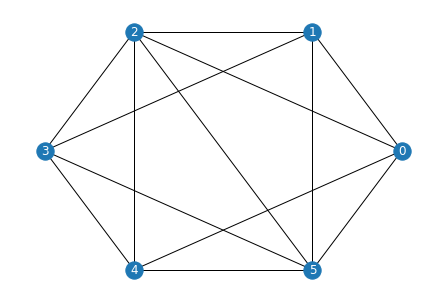

In [17]:
G = nx.Graph(W)
G.add_nodes_from(range(n))
nx.draw_circular(G, with_labels=True, font_color='w')

In [28]:
degs = np.sum(W, axis=0)
K = int(degs.max())
K

5

In [29]:
x = cp.Variable((n, K+1), boolean=True)
y = cp.Variable(1, integer=True)
obj = cp.Minimize(y)
cons = [cp.sum(x, axis=1) == 1]

for i in range(n):
    for j in range(n):
        if W[i,j] == 1:
            for k in range(0, K+1):
                cons.append(x[i,k] + x[j,k] <= 1)

for i in range(n):
    cons.append(y >= range(1, K+2) @ x[i])  # y >= 每个顶点所着色的颜色编号

prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：\n{x.value}'); print(f'最优值为：{prob.value}')

最优解为：
[[-0.  1. -0. -0. -0. -0.]
 [ 1. -0. -0. -0. -0. -0.]
 [-0. -0.  1. -0. -0. -0.]
 [-0.  1. -0. -0. -0. -0.]
 [ 1. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  1. -0. -0.]]
最优值为：4.0
